<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Detección de objetos en imágenes </h2>
</center>



Esta es una notebook autocontenida para el análisis de datos de la tabla de características de las carpetas de las imágenes del repositorio [Deuba](https://gitlab.com/ciiiutnfrc/deuba) propuesto para la mentoría *'Detección de objetos en imágenes'*.

Para detalles como se encontró la tabla que vamos a utilizar, revisen la notebook [0_DetecciónObjetos_ArmandoLaTabla.ipynb](0_DetecciónObjetos_ArmandoLaTabla.ipynb)


<a name="exploratory_data_analysis"></a>
## Consignas para la materia  Exploración y Curación de Datos

### 1 General 
*FECHA LÍMITE DE ENTREGA: 04/07*

* Integrantes: Juan Antonio - Roberta Devesa



### El Notebook


In [1]:
# acá vamos importando las librerías necesarias 
# y a medida que van surgiendo por necesidad, las van sumando, para mantener un orden y poder ubicarlas rápido
from IPython.display import Image as Imge
import pandas as pd
import numpy as np
import glob

#seguimos agregando librerías necesarias:
#las que no tengan, vayan instalándolas
import cv2
import numpy as np

import matplotlib.pyplot as plt
import PIL
from PIL import Image
from os import path
import os

#from google.colab.patches import cv2_imshow #en Colab!

import seaborn as sns
sns.set_context("talk")

Cargamos los datos a ser curados:

In [2]:
!ls

1_Análisis_y_visulalización.ipynb		 dataset
2_DetecciónObjetos_Exploración_y_Curación.ipynb


In [3]:
# Cargamos el dataframe:
dataset_train_werror_ = pd.read_csv('dataset/dataSet_train_crop_features_labels_wError.csv', low_memory=False) #porqué low? no hay por qué. Sino no reconoce algunos tipos de columnas sino
dataset_train_werror = dataset_train_werror_.drop(['Unnamed: 0'], axis=1) 

Con la función sample pueden ir recorriendo el dataFrame para econtrar anomalias en el mismo:

In [4]:
dataset_train_werror.sample(10)

filename  width  height clase   xmin   xmax  \
718   Video2-frame-000143_single_box_0.jpg    640     360   ccb  237.0  324.0   
928   Video3-frame-000108_single_box_3.jpg    640     360   csb  284.0  306.0   
1758  video5-frame-000429_single_box_0.jpg   1080    1080   ccb  285.0  802.0   
1901  video7-frame-000428_single_box_0.jpg    480     360   ccb  172.0  285.0   
1661  video5-frame-000125_single_box_0.jpg   1080    1080   ccb  282.0  394.0   
1395  Video8-frame-001499_single_box_0.jpg    400     224   csb  192.0    NaN   
1680  video5-frame-000233_single_box_0.jpg   1080    1080   ccb  352.0  504.0   
1918  video9-frame-000005_single_box_0.jpg   1280     720   csb  277.0  398.0   
1503  Video8-frame-001748_single_box_0.jpg    400     224   ccb  188.0  260.0   
120   Video1-frame-000159_single_box_0.jpg    640     360   ccb  431.0  500.0   

       ymin  ymax    use videoname  ...      2039      2040      2041  \
718    73.0   212  train    Video2  ...  0.314432  0.231211  1.141633   
928    81.0   118  train    Video3  ...  0.133642  0.206919  0.316331   
1758  134.0   903  train    video5  ...  0.474236  0.529871  0.718170   
1901  100.0   241  train    video7  ...  0.162650  0.315533  0.573054   
1661  349.0   474  train    video5  ...  0.135482  0.742037  0.001440   
1395   42.0   139  train    Video8  ...  0.556681  0.428483  0.000842   
1680  311.0   494  train    video5  ...  0.153520  0.326923  0.157268   
1918  201.0   348  train    video9  ...  0.040523  0.027425  0.034266   
1503   35.0   120  train    Video8  ...  0.111483  0.565623  0.309754   
120    67.0   133  train    Video1  ...  1.503248  0.065481  0.644366   

          2042      2043      2044      2045      2046      2047  new  
718   1.048276  0.194883  0.119623  0.237137  0.481658  0.293444    0  
928   1.364942  0.078608  0.009054  0.018816  0.292157  0.001257    0  
1758  0.198822  0.245937  0.365088  0.318455  1.247490  0.033947    0  
1901  0.971854  0.266803  0.306666  0.592836  0.414121  0.280506    0  
1661  0.282824  0.423955  0.171258  0.052276  0.205627  0.058657    0  
1395  0.463164  0.356807  0.029374  0.101919  0.380723  0.000000    0  
1680  0.589838  0.142558  0.050301  0.521206  0.409243  0.288461    0  
1918  0.481995  0.014731  0.051458  0.025086  0.341270  0.000491    0  
1503  0.256369  0.227834  0.108640  0.512036  0.413208  0.118855    0  
120   1.231256  0.457633  0.741811  0.255957  0.300976  0.217430    0  

[10 rows x 2064 columns]

#### Algunas exploraciones que pueden realizar:

Encontrando duplicados:

In [5]:
duplicated = dataset_train_werror[dataset_train_werror.duplicated()]
duplicated

filename  width  height clase   xmin   xmax  \
1     Video1-frame-000001_single_box_0.jpg    640     360   csb  304.0  359.0   
3     Video1-frame-000002_single_box_0.jpg    640     360   csb  300.0  363.0   
4     Video1-frame-000002_single_box_0.jpg    640     360   csb  300.0  363.0   
5     Video1-frame-000002_single_box_0.jpg    640     360   csb  300.0  363.0   
7     Video1-frame-000003_single_box_0.jpg    640     360   csb  301.0  368.0   
...                                    ...    ...     ...   ...    ...    ...   
1841  video7-frame-000255_single_box_0.jpg    480     360   ccb   82.0  130.0   
1854  video7-frame-000301_single_box_0.jpg    480     360   ccb  319.0  397.0   
1857  video7-frame-000319_single_box_0.jpg    480     360   csb  185.0  350.0   
1861  video7-frame-000334_single_box_0.jpg    480     360   ccb  206.0  255.0   
1864  video7-frame-000347_single_box_0.jpg    480     360   csb  260.0  352.0   

      ymin  ymax    use videoname  ...      2039      2040      2041  \
1     58.0   136  train    Video1  ...  0.174334  0.082095  0.051256   
3     61.0   136  train    Video1  ...  0.330701  0.123241  0.102351   
4     61.0   136  train    Video1  ...  0.330701  0.123241  0.102351   
5     61.0   136  train    Video1  ...  0.330701  0.123241  0.102351   
7     60.0   141  train    Video1  ...  0.262259  0.195963  0.096156   
...    ...   ...    ...       ...  ...       ...       ...       ...   
1841   NaN   141  train    video7  ...  0.526813  0.563038  0.042727   
1854  61.0   172  train    video7  ...  1.141764  1.189795  0.472682   
1857  61.0   216  train    video7  ...  0.449569  0.072107  0.267007   
1861   NaN   246  train    video7  ...  1.050178  0.041271  0.272507   
1864   NaN   215  train    video7  ...  0.076062  0.000000  0.121161   

          2042      2043      2044      2045      2046      2047  new  
1     0.315918  0.332574  0.003393  0.009189  0.574400  0.002943    0  
3     0.385447  0.226580  0.119403  0.024265  0.584723  0.016324    0  
4     0.385447  0.226580  0.119403  0.024265  0.584723  0.016324    0  
5     0.385447  0.226580  0.119403  0.024265  0.584723  0.016324    0  
7     0.378540  0.123568  0.130680  0.034125  0.363607  0.022648    0  
...        ...       ...       ...       ...       ...       ...  ...  
1841  1.625644  0.281132  0.427521  0.388549  1.284613  0.251235    0  
1854  0.675242  0.147483  0.694560  0.419786  0.262915  0.581734    0  
1857  0.481489  0.407313  0.050470  0.648988  0.151267  0.222800    0  
1861  1.201224  0.129799  0.292825  0.489888  0.199137  0.230920    0  
1864  0.518747  0.257622  0.511867  0.053332  0.264311  0.024500    0  

[101 rows x 2064 columns]

Encontrando valores nulos:

Para la columna "clase":

In [6]:
null = dataset_train_werror[dataset_train_werror.clase.isnull()]
null

filename  width  height clase   xmin   xmax  \
1201  Video8-frame-000606_single_box_0.jpg    400     224   NaN  237.0  268.0   
1202  Video8-frame-000684_single_box_0.jpg    400     224   NaN  263.0  350.0   
1203  Video8-frame-000684_single_box_0.jpg    400     224   NaN  263.0  350.0   
1204  Video8-frame-000685_single_box_0.jpg    400     224   NaN  223.0  342.0   
1205  Video8-frame-000686_single_box_0.jpg    400     224   NaN  184.0  312.0   
1445  Video8-frame-001544_single_box_0.jpg    400     224   NaN  180.0  262.0   
1446  Video8-frame-001545_single_box_0.jpg    400     224   NaN  173.0  255.0   
1447  Video8-frame-001545_single_box_0.jpg    400     224   NaN  173.0  255.0   
1448  Video8-frame-001546_single_box_0.jpg    400     224   NaN  173.0  253.0   
1964  video9-frame-000193_single_box_0.jpg   1280     720   NaN  237.0  294.0   
1965  video9-frame-000193_single_box_1.jpg   1280     720   NaN  563.0  594.0   
1966  video9-frame-000193_single_box_2.jpg   1280     720   NaN  451.0  486.0   

       ymin  ymax    use videoname  ...      2039      2040      2041  \
1201    1.0    35  train    Video8  ...  0.804117  1.250290  0.164327   
1202   43.0   176  train    Video8  ...  0.027401  0.091262  0.218495   
1203   43.0   176  train    Video8  ...  0.027401  0.091262  0.218495   
1204   22.0   176  train    Video8  ...  0.137698  0.348525  0.180753   
1205   13.0   177  train    Video8  ...  0.137956  0.299306  0.259760   
1445   49.0   133  train    Video8  ...  0.017656  0.144678  0.005384   
1446   50.0   144  train    Video8  ...  0.157837  0.176308  0.000000   
1447   50.0   144  train    Video8  ...  0.157837  0.176308  0.000000   
1448   49.0   138  train    Video8  ...  0.043007  0.108922  0.000000   
1964  337.0   416  train    video9  ...  0.429119  0.893197  0.350529   
1965  315.0   359  train    video9  ...  1.974903  0.231187  0.067074   
1966  306.0   364  train    video9  ...  0.471030  0.542994  0.173348   

          2042      2043      2044      2045      2046      2047  new  
1201  0.511096  0.216181  0.904814  0.053402  0.326598  0.057060    0  
1202  0.705281  0.113451  0.326732  0.184910  0.324175  0.079542    0  
1203  0.705281  0.113451  0.326732  0.184910  0.324175  0.079542    0  
1204  0.845649  0.085244  0.411012  0.646327  0.035083  0.111341    0  
1205  0.674111  0.143130  0.665215  0.398299  0.155081  0.275111    0  
1445  0.510191  0.187041  0.016946  0.073192  0.333905  0.193656    0  
1446  0.451428  0.110993  0.063326  0.071295  0.130317  0.058196    1  
1447  0.451428  0.110993  0.063326  0.071295  0.130317  0.058196    0  
1448  0.327192  0.179698  0.086941  0.102937  0.307029  0.044698    0  
1964  0.893103  0.280011  0.168379  0.265364  0.584582  0.089428    0  
1965  1.334000  0.355000  0.808413  0.210801  0.495795  0.078318    0  
1966  1.700635  0.132195  0.275495  0.193758  0.337207  0.115494    0  

[12 rows x 2064 columns]

In [7]:
#def de funciones
def plotbar (df,clase_name,sample_kind):
    df_ = df[clase_name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(x=df_.index,y= df_.values, alpha=0.9)
    plt.title(sample_kind)
    plt.ylabel('Number ', fontsize=12)
    plt.xlabel(clase_name, fontsize=12)
    plt.show()

### 2 Exploración y Curación de las variables

#### Actividades para corregir errores e inconsistencias de las tablas de datos:

   * **Chequeen los tipos de datos. ¿Se corresponden a lo esperado?**
   
   Los features son mismos de la vez pasada, pero hay datos faltantes
   
   
   * Tomar porciones aleatorias del dataframe para ver si van descubriendo inconsistencias, vayan notándolas y proponiendo como solucionarlas.
   

   * **Cuántas imágenes originales tienen en total?**

In [8]:
print ("registros",dataset_train_werror.shape[1])

registros 2064


* **Chequeen valores nulos, extremos y duplicados. ¿Qué hacemos con ellos? ¿Podemos eliminarlos?**

In [9]:
# valores faltantes de cada clase
missing_values_count = dataset_train_werror.isnull().sum()
missing_values_count[missing_values_count > 0]

clase    12
xmin     17
xmax     12
ymin     25
ch_R     14
ch_G     16
ch_B     19
dtype: int64

In [10]:
# Valores duplicados de la clase filename
dNcount = duplicated.filename.groupby([duplicated.filename]).count()
dNcount

filename
Video1-frame-000001_single_box_0.jpg    1
Video1-frame-000002_single_box_0.jpg    3
Video1-frame-000003_single_box_0.jpg    3
Video1-frame-000014_single_box_0.jpg    1
Video1-frame-000016_single_box_0.jpg    1
                                       ..
video7-frame-000255_single_box_0.jpg    1
video7-frame-000301_single_box_0.jpg    1
video7-frame-000319_single_box_0.jpg    1
video7-frame-000334_single_box_0.jpg    1
video7-frame-000347_single_box_0.jpg    1
Name: filename, Length: 89, dtype: int64

Considerando que son pocos valores faltantes podiamos eliminarlos. 


* **Si no los eliminan, ¿qué estrategia utilizarían para imputarlos? Esto serviría para cualquier clase de datos?**



**podemos obtener los valores faltantes de un modo seguro considerando que todas las imagenes de un mismo video son similares entre si, de este modo al imputar los valores faltantes no estaremos considerando valores muy distintos al orgiginal**


Esto seria bastante seguro para el feature *clase* pero no igual para el resto considerando ue puede haber mas variabilidad de los vaores, aun cuando se consideren imagenes de un mismo video para imputar

   
   * **Verificar si los tipos de clase de los objeto son los esperados. Puede haber errores de anotación.**
   
   
   Podemos hacer un listado de los objetos del feature *clase*  y ver cuantos de ellos hay. ver Fig1.

objetos de clase:  ['CCb' 'CcB' 'CsB' 'ccb' 'csb' 'nan']


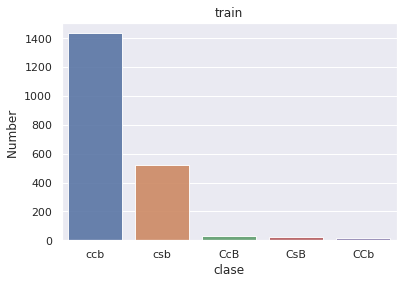

Fig1


In [11]:
print("objetos de clase: ", np.unique(dataset_train_werror.clase.to_list()))

plotbar (dataset_train_werror,'clase','train')
print("Fig1")

Como podemos ver figura mal escrito algunas veces pero como solo se permuta las letras por la mayuscula correspondiende podemos simplemente corregirlo

In [12]:
dataset_train_werror['clase'] = dataset_train_werror['clase'].replace(['CcB'],'ccb')
dataset_train_werror['clase'] = dataset_train_werror['clase'].replace(['CCb'],'ccb')
dataset_train_werror['clase'] = dataset_train_werror['clase'].replace(['CsB'],'csb')

In [13]:
print("objetos de clase: ", np.unique(dataset_train_werror.clase.to_list()))


objetos de clase:  ['ccb' 'csb' 'nan']


Veamos brevemente si la variable categorica *use* tambien tiene este tipo de errores

In [14]:
print("objetos de use: ", np.unique(dataset_train_werror.use.to_list()))


objetos de use:  ['train']


### Imputacion

In [15]:
df=dataset_train_werror

In [16]:
video_name = np.unique(dataset_train_werror.videoname.to_list())

In [17]:
for name in video_name:
    
    df_ = df[df['videoname'] ==name]

    df['clase'].fillna(str(df_['clase'].iloc[0]), inplace=True)
    df['xmin'].fillna(int(df_['xmin'].mean()), inplace=True)  
    df['xmax'].fillna(int(df_['xmax'].mean()), inplace=True)
    df['ymin'].fillna(int(df_['ymin'].mean()), inplace=True)
    df['ch_R'].fillna(int(df_['ch_R'].mean()), inplace=True) 
    df['ch_G'].fillna(int(df_['ch_G'].mean()), inplace=True)
    df['ch_B'].fillna(int(df_['ch_B'].mean()), inplace=True)
    #print(df_)

In [18]:
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [19]:
print(list(df.columns))

['filename', 'width', 'height', 'clase', 'xmin', 'xmax', 'ymin', 'ymax', 'use', 'videoname', 'bb_width', 'bb_height', 'ch_R', 'ch_G', 'ch_B', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '1


    
### Actividades para exploración:     
Con los datos ya curados, utilizando los dos dataset (train y test) y en base a las conclusiones de la entrega anterior, responder las siguientes preguntas, fundamentar con los análisis y gráficas correspondientes: 

   * **¿Se puede aplicar One-Hot encoding? ¿A que variables?**
   
   
   Se puede aplicar a las variables categoricas. En este caso podria ser *videoname*. No vale lapena aplicarlo al filename ya que actua como un index. ni a use ya que es el mismo valor para todo el data set de entrenamiento / testeo, no apora informaion.
   
   
   * **¿Se observó algún tipo de segos en los datos? ¿Como los curaria?**
   
   
   Podria existir un sesgo a partir de la variable video. Si hay muchas mas imagenes proveniente de un video mas que de otro (ver Fig.2), podriamos inclinar el dataset a un tipo de escenario.
   
   
   

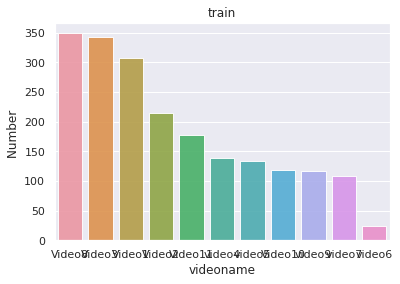

Fig.2


In [20]:
plotbar (df,'videoname','train')
print("Fig.2")

Tambien podriamos tener tener un bias por tener mas objetos de una clase que de la otra  (Fig.3)

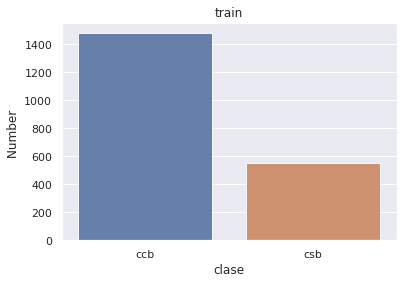

Fig.3


In [21]:
plotbar (df,'clase','train')
print("Fig.3")

   Existen muchos metodos de balanceo de datos. Por ejemplo se podria recorar el dataset para que todas las clases tengan la mima cantidad de datos que la clase limitante, o podriamos generar pseudo datos para incrementar los datos de esta clase, o ambas.
   
   En este caso podriamos primero balancear las clases de ccb y csb (Fig. 4), y luego volver a analizar como queda el balance de la variable *videoname* (Fig.5)

Random over-sampling:
csb    1480
ccb    1480
Name: clase, dtype: int64


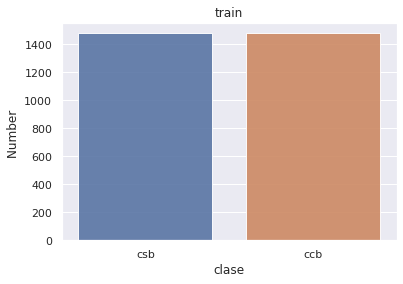

Fig.4


In [22]:

df_clase_ccb = df[df['clase'] == 'ccb']
df_clase_csb = df[df['clase'] == 'csb']


df_clase_csb_over = df_clase_csb.sample(df_clase_ccb.shape[0], replace=True)

df_ = pd.concat([df_clase_ccb, df_clase_csb_over], axis=0)

print('Random over-sampling:')
print(df_.clase.value_counts())

plotbar (df_,'clase','train')
print("Fig.4")

Ahora las clases quedaron balancadas, veamos como quedo la distribucion de *videoname*

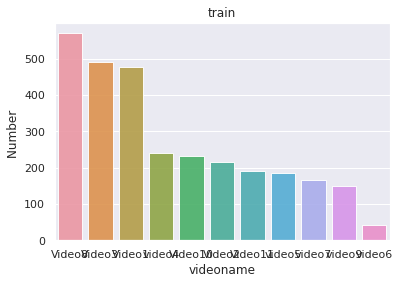

Fig.5


In [23]:
plotbar (df_,'videoname','train')
print("Fig.5")

**Obs:**  Este estudio ya se realizo en el notebook1. En el mismo vimos como el *videoname* minoritario poseia imagenes similares a otros videos del dataset, de modo que no esperamos que genere un bias. 

**Obs2:** En muchos modelos de cnn uno puede aplicar una funcion de pesos en la **Loss** que contemple el desbalance de clases. como la **weighted binary cross entropy**. y tambien puede aplicar metodos de **image augumentation** para aumentar los datos del dataset y hacerlos mas robustos.


   * **¿Como solucionar los outliers?**
   
   
   Como vimos en el notebook1 existen outliers sin embargo estos pueden no representar un problema n el dataset. dependera del metodo que se aplique. 
     
   

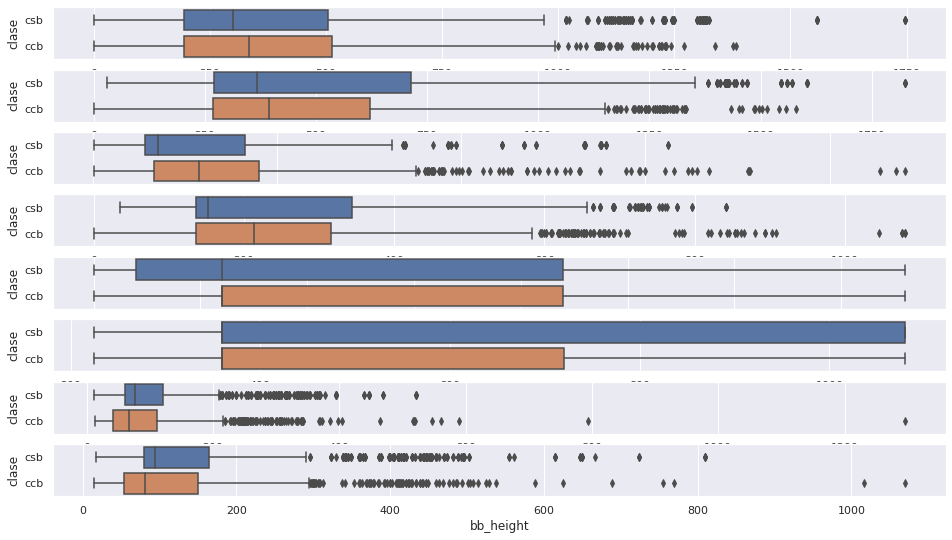

In [24]:

ny = 1
nx = 8#int(ntot/ny) + 1

df_2 = df_

feature = ['xmin', 'xmax', 'ymin', 'ymax','width','height','bb_width','bb_height','clase']
f, axes = plt.subplots(nx,ny,figsize=(16,9))

for ax,f in zip(axes.flat[0:8], feature):

    sns.boxplot(x=f,data = df_,y="clase", order=['csb','ccb'],ax=ax)

plt.show()

Recuerden de trabajar sobre una copia de la tabla así siempre pueden volver a comenzar si así fuera necesario. Vayan llevando las correcciones a cabo de manera clara. 

Además de lo que dieron en las clases, pueden fijarse diferentes en el siguiente [link](https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/) otros enfoques.

Utilizar gráficos que permitan visualizar de un modo simple las conclusiones.

### Análisis general de la información de los videos

**¿Qué videos aportan mas diversidad y cuales son mas de lo mismo?**

A continuación se hace un análisis *N-1* de los videos. En el mismo, para cada iteración, se extrae toda la información del video N y se comparan algunas features importantes del mismo. De esta forma, si en algún caso las variables cambian significativamente, podemos llegar a la conclusión de que el video aporta información *diferente* al resto.

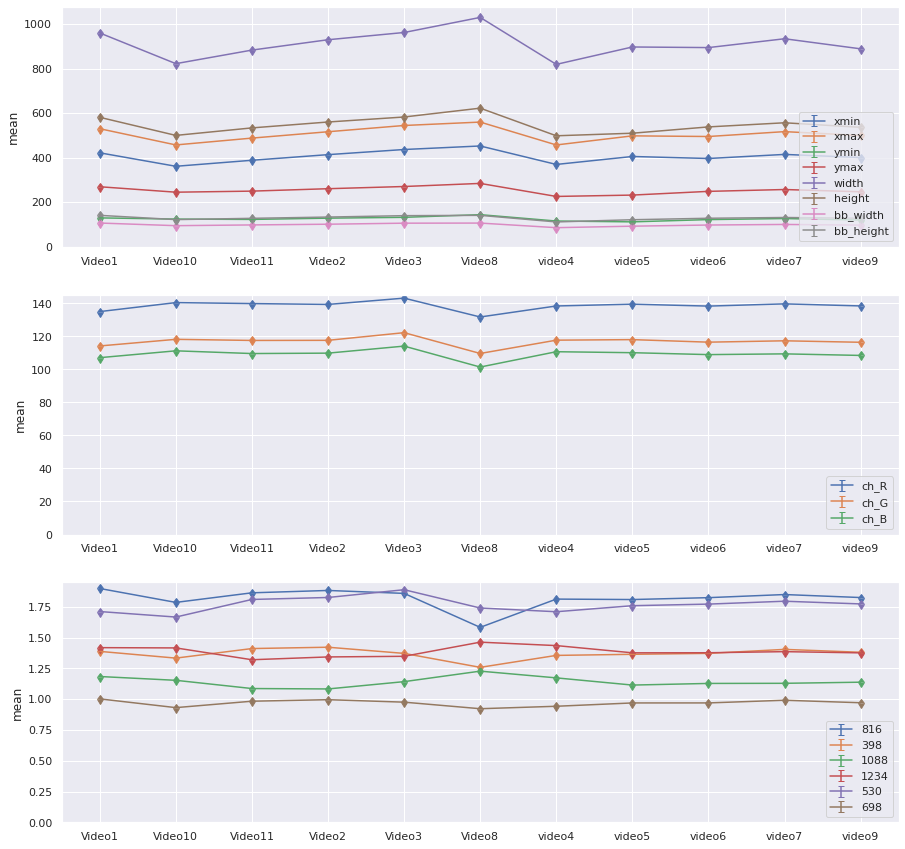

In [25]:
videos_names = np.unique(df_.videoname.to_list())

def plot_features_n1(features, ax):
    first_run = True

    x_ticks_labels = []
    
    for feature in features:
        mean_ = []
        std_ = []

        for vi, video in enumerate(videos_names):
            df_n1= df_[df_['videoname'] != video]

            m = df_n1[feature].mean()
            s = df_n1[feature].std()

            mean_.append(m)
            std_.append(s)
            
            if first_run:
                x_ticks_labels.append(video)

        first_run = False
        x = np.arange(len(mean_))
        
        ax.errorbar(x, mean_, yerr=std_, uplims=True, lolims=True, label=feature)
        
        ax.set_ylabel('mean')
        ax.set_ybound(lower=0)
        ax.legend(loc='lower right')
        ax.set_xticks(x)
        ax.set_xticklabels(x_ticks_labels)
    
    return ax


fig, axs = plt.subplots(3, 1)
fig.set_figwidth(15)
fig.set_figheight(15)

features = ['xmin', 'xmax', 'ymin', 'ymax','width','height','bb_width','bb_height']
plot_features_n1(features, axs[0])

ch_features = ['ch_R', 'ch_G', 'ch_B']
plot_features_n1(ch_features, axs[1])

k_best_features = ["816", "398", "1088", "1234", "530", "698"]
plot_features_n1(k_best_features, axs[2])

plt.show()

Como podemos observar en los resultados, ninguno de los videos representa por sí mismo una diferencia sustancial en las variables analizadas.

### Análisis de las columnas de feature

¿Toman valores menores a 0 o mayores que 1? ¿Qué significa?

In [26]:
feat_cols = [str(col_name) for col_name in range(2048)]
X = df[feat_cols]
X.describe()

0            1            2            3            4  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000   
mean      0.275249     0.186136     0.323158     0.315301     0.258431   
std       0.242903     0.143309     0.291234     0.236654     0.239357   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.078568     0.074635     0.129980     0.134911     0.083965   
50%       0.206235     0.154783     0.246105     0.256659     0.197373   
75%       0.413548     0.263622     0.420040     0.433924     0.375397   
max       1.503384     1.004272     3.034442     1.841052     3.060447   

                 5            6            7            8            9  ...  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000  ...   
mean      0.598984     0.263001     0.647586     0.662885     0.199070  ...   
std       0.425416     0.264058     0.360730     0.486807     0.170944  ...   
min       0.000000     0.000000     0.030816     0.005957     0.000000  ...   
25%       0.282272     0.086381     0.368005     0.286322     0.075945  ...   
50%       0.521192     0.175228     0.570073     0.550699     0.150964  ...   
75%       0.822803     0.349342     0.883933     0.947865     0.274980  ...   
max       2.646390     2.279451     2.310968     2.804032     1.181489  ...   

              2038         2039         2040         2041         2042  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000   
mean      0.625702     0.511500     0.406020     0.386438     0.678703   
std       0.326319     0.514540     0.335923     0.411339     0.420742   
min       0.005355     0.000000     0.000000     0.000000     0.040234   
25%       0.382739     0.153721     0.164646     0.080467     0.368808   
50%       0.583783     0.349350     0.314155     0.245274     0.563066   
75%       0.820650     0.700779     0.557349     0.568092     0.899533   
max       2.187714     3.801980     2.194635     2.362681     3.024054   

              2043         2044         2045         2046         2047  
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000  
mean      0.209356     0.230943     0.203422     0.492193     0.134688  
std       0.174309     0.240796     0.182853     0.357256     0.144141  
min       0.000000     0.000000     0.000000     0.004597     0.000000  
25%       0.071092     0.055908     0.063232     0.245520     0.032155  
50%       0.170684     0.145993     0.149732     0.412929     0.084090  
75%       0.304899     0.324547     0.298892     0.628309     0.183476  
max       1.457797     1.673558     1.510262     2.594864     1.216745  

[8 rows x 2048 columns]

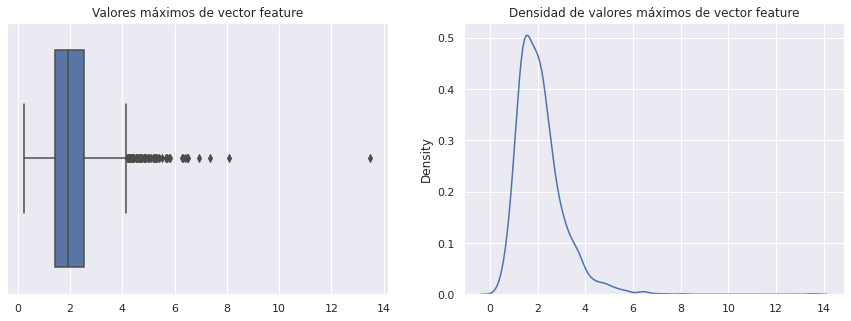

In [27]:
max_values = X.max()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.boxplot(x=max_values, ax=axs[0])
ax.set_title("Valores máximos de vector feature")
ax = sns.kdeplot(x=max_values, ax=axs[1])
ax.set_title("Densidad de valores máximos de vector feature")
plt.show()


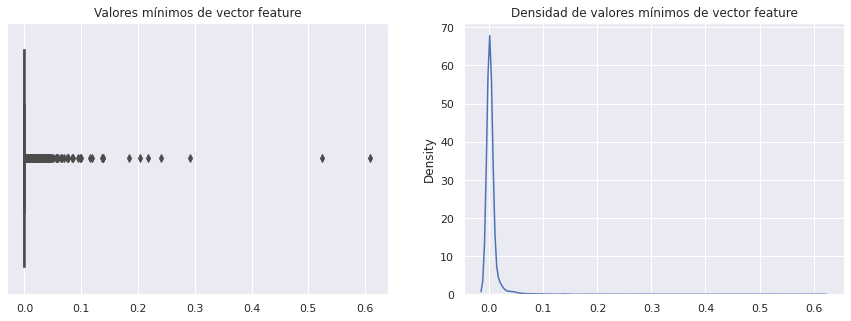

In [28]:
min_values = X.min()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.boxplot(x=min_values, ax=axs[0])
ax.set_title("Valores mínimos de vector feature")
ax = sns.kdeplot(x=min_values, ax=axs[1])
ax.set_title("Densidad de valores mínimos de vector feature")
plt.show()

Vemos que la mayoría de las columnas de features (p95) se encuentra entre 0-5. Pero tenemos algunos *outliers*. Por lo tanto deberíamos utilizar alguna estrategia de normalización de los datos para hacer análisis sobre ellos.

Analicemos los valores mayores a 6, para entender mejor nuestros *outliers*

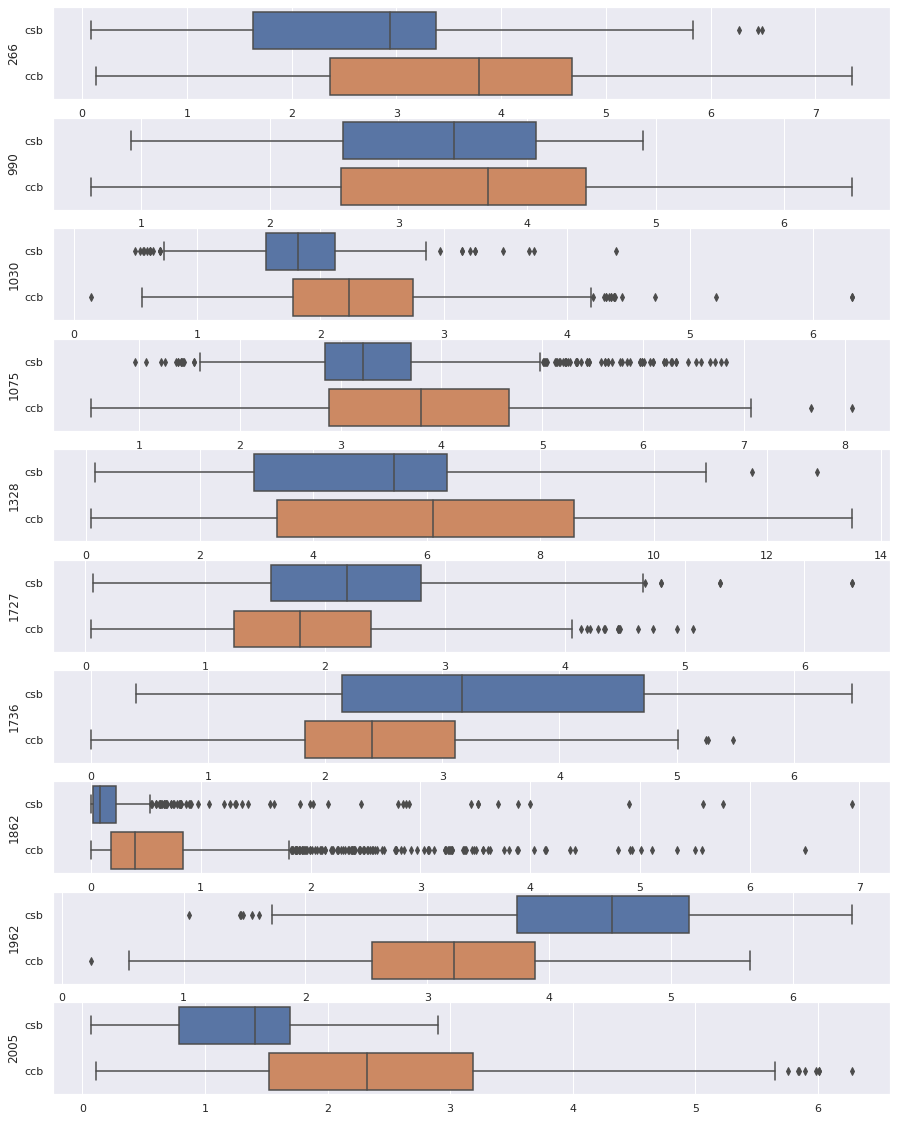

In [29]:
outlier_cols = [str(indx) for indx in np.where(max_values > 6)[0]]
f, axes = plt.subplots(len(outlier_cols), 1, figsize=(15, 20))

for i, feature in enumerate(outlier_cols):
    ax = axes[i]
    sns.boxplot(data=df[[feature, "clase"]], x=feature, y="clase", order=['csb','ccb'], ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feature)

plt.show()

Por lo que vemos de las distribuciones de estas features y sus posibles outliers, no perderíamos mucho valor al escalar los valores entre 0-1 para posteriores análisis. Ya que el rango de todas es muy similar, salvo por la feature número `1328`, pero la misma no tiene outliers fuera de su p95, con lo cual podemos esperar que el escalado no afectará los análisis que hagamos.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
normalized_X_np = scaler.transform(X)
normalized_X_np = normalized_X_np.transpose()
print(normalized_X_np.shape)
normalized_X_np

(2048, 2032)


array([[0.00219934, 0.00219934, 0.03409438, ..., 0.25563685, 0.18070571,
        0.04314435],
       [0.11026527, 0.11026527, 0.18063308, ..., 0.35272189, 0.19607351,
        0.14582606],
       [0.02803559, 0.02803559, 0.02659753, ..., 0.03584654, 0.1627125 ,
        0.10321508],
       ...,
       [0.00608425, 0.00608425, 0.01606679, ..., 0.50242233, 0.31968167,
        0.24955342],
       [0.21997836, 0.21997836, 0.22396364, ..., 0.32625584, 0.24488373,
        0.25960069],
       [0.00241861, 0.00241861, 0.01341614, ..., 0.12352441, 0.21580039,
        0.00107889]])

In [31]:
x_dict = {str(col): normalized_X_np[col] for col in range(2048)}
normalized_X = pd.DataFrame(x_dict)
normalized_X.describe()

0            1            2            3            4  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000   
mean      0.183086     0.185344     0.106497     0.171261     0.084442   
std       0.161571     0.142699     0.095976     0.128543     0.078210   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.052260     0.074317     0.042835     0.073279     0.027436   
50%       0.137181     0.154125     0.081104     0.139409     0.064491   
75%       0.275078     0.262500     0.138424     0.235693     0.122661   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5            6            7            8            9  ...  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000  ...   
mean      0.226340     0.115379     0.270495     0.234779     0.168491  ...   
std       0.160753     0.115843     0.158204     0.173979     0.144685  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.106663     0.037896     0.147880     0.100199     0.064279  ...   
50%       0.196945     0.076873     0.236500     0.194685     0.127774  ...   
75%       0.310915     0.153257     0.374149     0.336627     0.232740  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              2038         2039         2040         2041         2042  \
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000   
mean      0.284255     0.134535     0.185005     0.163559     0.213977   
std       0.149526     0.135335     0.153066     0.174099     0.141008   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.172925     0.040432     0.075022     0.034057     0.110118   
50%       0.265047     0.091886     0.143147     0.103812     0.175223   
75%       0.373584     0.184320     0.253960     0.240444     0.287986   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              2043         2044         2045         2046         2047  
count  2032.000000  2032.000000  2032.000000  2032.000000  2032.000000  
mean      0.143611     0.137995     0.134693     0.188242     0.110695  
std       0.119570     0.143883     0.121073     0.137922     0.118464  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.048767     0.033407     0.041868     0.093011     0.026427  
50%       0.117083     0.087235     0.099143     0.157641     0.069110  
75%       0.209150     0.193926     0.197907     0.240791     0.150793  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 2048 columns]

### Análisis de PCA

**¿A que variables del dataFrame se les puede aplicar PCA? Realizar un análisis con las gráficas correspondientes.**

Las variables de *features* son un buen candidato para PCA. Como vimos en el notebook de análisis y visualización, algunas columnas de feature parecen ser buenos candidatos para la discriminación de las clases. Un PCA sobre esas columnas podría maximizar la capacidad discriminativa.

In [32]:
from sklearn import decomposition
from sklearn import datasets

explained_variance_components = 15
pca = decomposition.PCA(n_components=explained_variance_components)
pca.fit(normalized_X)
pca_X = pca.transform(normalized_X)

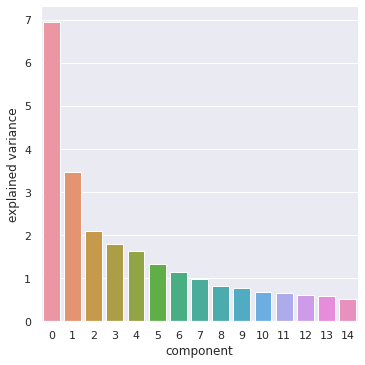

In [33]:
x_component = np.array(range(explained_variance_components))
catplot_df = pd.DataFrame(
    {
        "component": x_component,
        "explained variance": pca.explained_variance_,
        "explained var ratio": pca.explained_variance_ratio_
    }
)
sns.catplot(x="component", y="explained variance", data=catplot_df, kind="bar")
plt.show()

Vemos que después del quinto componente, el diferencial con el siguiente componente se vuelve despreciable. En los siguiente análisis haremos PCA con 3 componentes con el fin de poder visualizar claramente su representación.

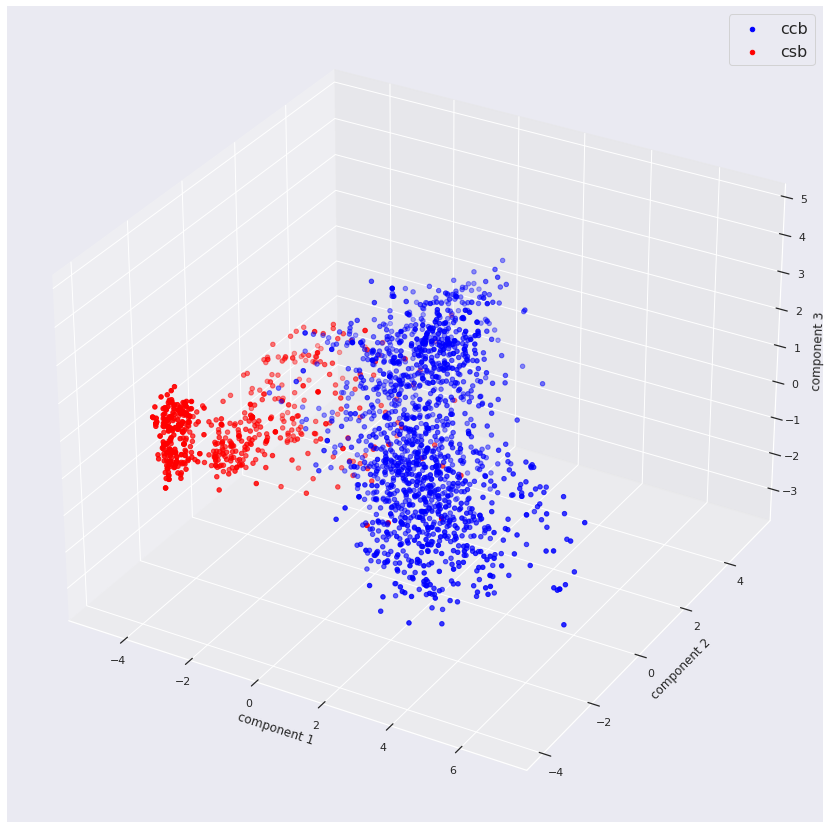

In [34]:
pca = decomposition.PCA(n_components=3)
pca.fit(normalized_X)
pca_X = pca.transform(normalized_X)

cls = df["clase"]
df_pca_X = pca_X.transpose()
pca_df = pd.DataFrame({
    "clase": cls,
    "component 1": df_pca_X[0],
    "component 2": df_pca_X[1],
    "component 3": df_pca_X[2]
})
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_zlabel("component 3")

for label in ["ccb", "csb"]:
    filtered_df = pca_df[pca_df["clase"] == label]
    x = filtered_df['component 1']
    y = filtered_df['component 2']
    z = filtered_df['component 3']
    color = "blue" if label == "ccb" else "red"
    ax.scatter(x, y, z, c=color, label=label)

ax.legend(fontsize=16)

plt.show()

Otro análisis posible podría ser tomando solo aquellas *features* que mejor explican las etiquetas (según el análisis realizado en la entrega 1), y aplicar PCA sobre eso.

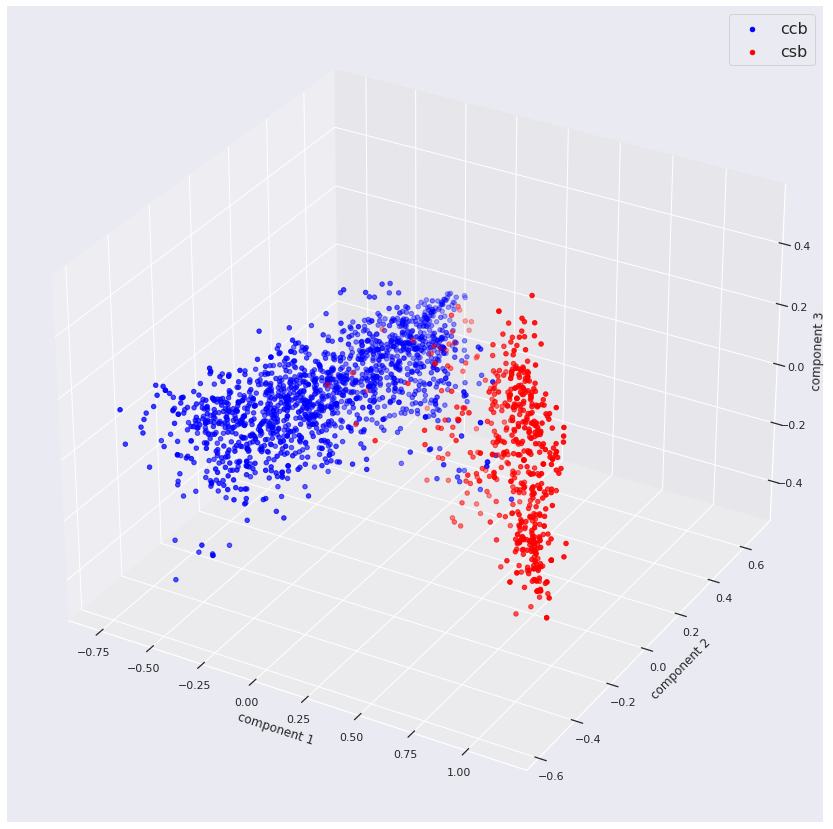

In [35]:
# Datos obtenidos de la entrega 1
k_best_features = ["816", "398", "1088", "1234", "530", "698"]

X_best = normalized_X[k_best_features]
cls = df["clase"]

pca = decomposition.PCA(n_components=3)
pca.fit(X_best)
pca_X_best = pca.transform(X_best)
df_pca_X_best = pca_X_best.transpose()

pca_df_best = pd.DataFrame({
    "clase": cls,
    "component 1": df_pca_X_best[0],
    "component 2": df_pca_X_best[1],
    "component 3": df_pca_X_best[2]
})
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_zlabel("component 3")

for label in ["ccb", "csb"]:
    filtered_df = pca_df_best[pca_df["clase"] == label]
    x = filtered_df['component 1']
    y = filtered_df['component 2']
    z = filtered_df['component 3']
    color = "blue" if label == "ccb" else "red"
    ax.scatter(x, y, z, c=color, label=label)

ax.legend(fontsize=16)

plt.show()

Visualmente, podemos ver que existe potencialmente una buena capacidad discriminativa en ambos casos. En el segundo, la discriminación parece estar un poco mas marcada. Pero necesitaríamos aplicar otros métodos para evaluar si es posible armar un modelo de discriminación con estas herramientas.

### Power transformer

**Aplicar power transoformer a las variables que considere. ¿Que resultados se pueden obtener?**

Aplicamos power transformer para estudiar sus efectos sobre las *K-best* features del dataset. Analicemos primero las distribuciones actuales y sus relaciones.

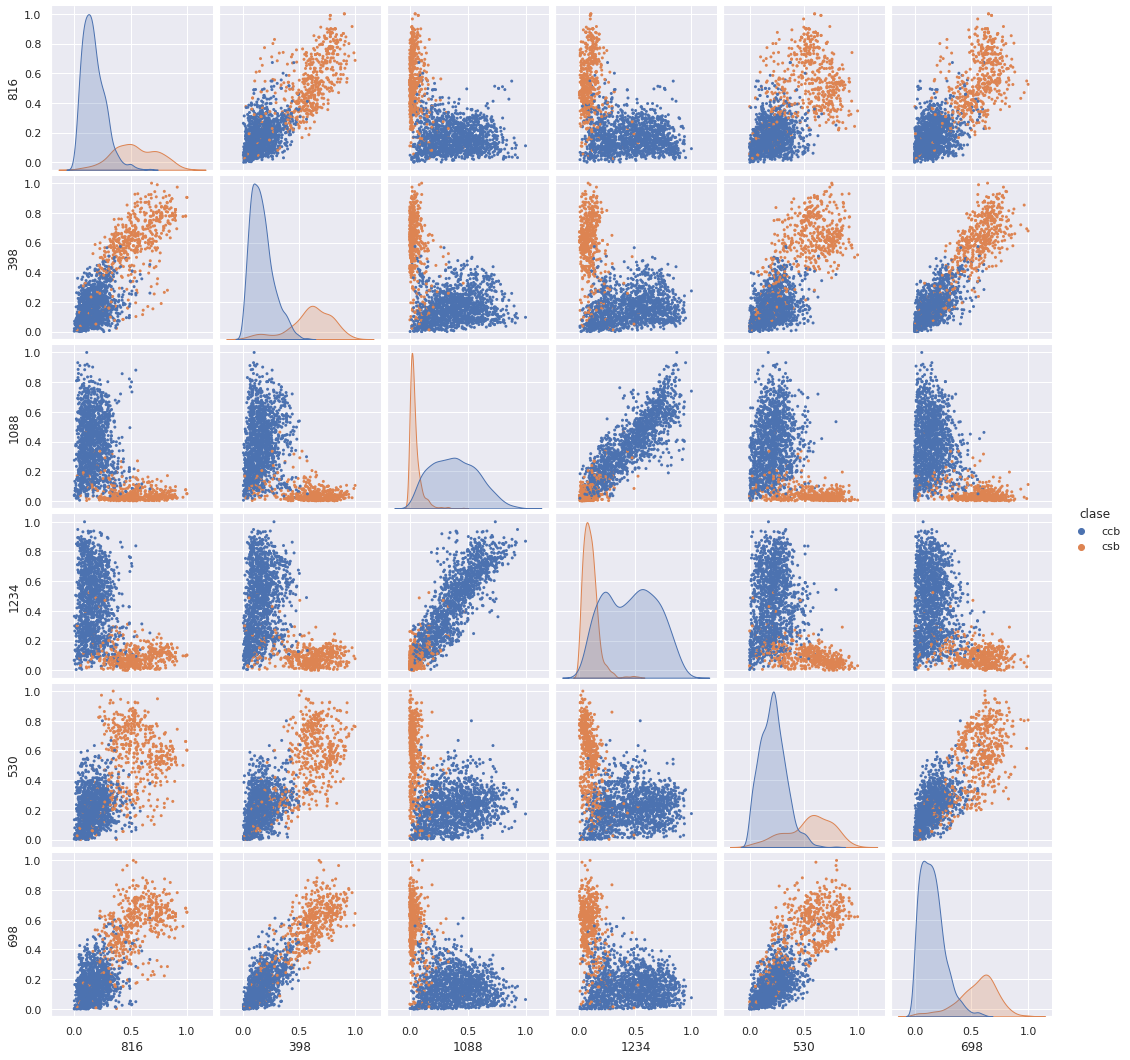

In [36]:
k_best_df = pd.concat((X_best, df[["clase"]]), axis=1)

sns.pairplot(k_best_df, hue='clase',hue_order=['ccb', 'csb'],markers='.',plot_kws=dict(edgecolor="None",linewidth=1))
sns.despine()

*6-best features* antes de Power Transform.

In [37]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(k_best_df[k_best_features])

pw_transformed_data = pt.transform(k_best_df[k_best_features])
pw_transformed_data = pw_transformed_data.transpose()

pw_transformed_dict = {k_best_features[i]: pw_transformed_data[i] for i in range(len(k_best_features))}
pw_transformed_df = pd.concat((pd.DataFrame(pw_transformed_dict), df[["clase"]]), axis=1)


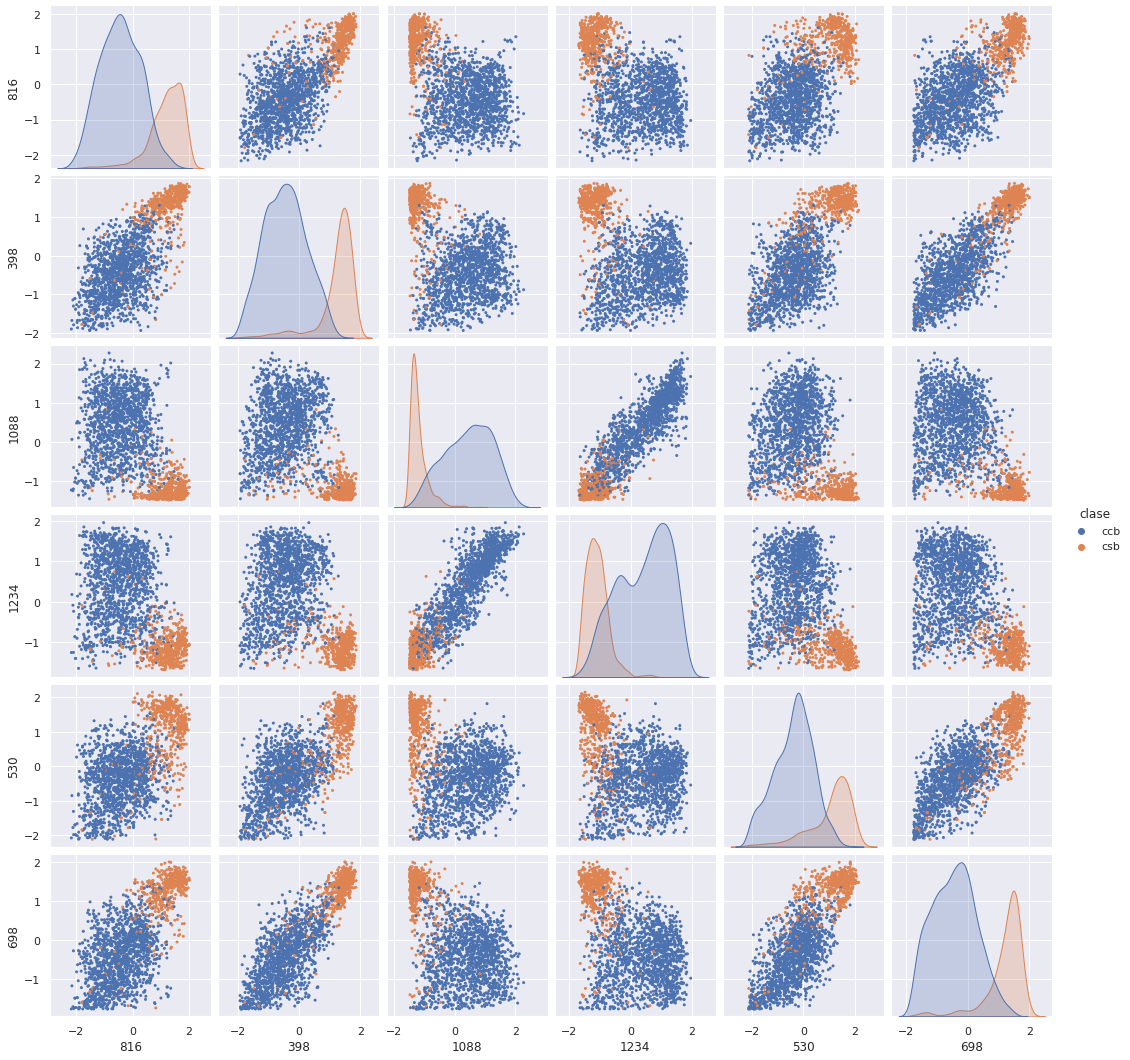

In [38]:
sns.pairplot(
    pw_transformed_df,
    hue='clase',
    hue_order=['ccb', 'csb'],
    markers='.',
    plot_kws=dict(edgecolor="None",linewidth=1)
)

sns.despine()

A continuación, mostramos las features transformadas con *power transform* al aplicar PCA sobre las mismas.

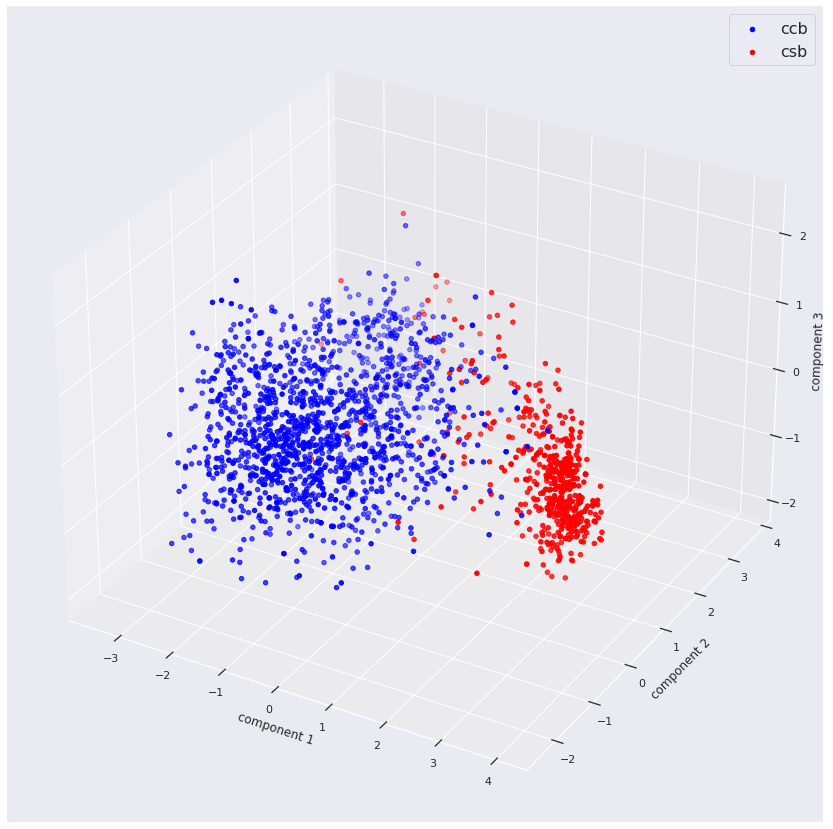

In [39]:
X_best = pw_transformed_df[k_best_features]
cls = df["clase"]

pca = decomposition.PCA(n_components=3)
pca.fit(X_best)
pca_X_best = pca.transform(X_best)
df_pca_X_best = pca_X_best.transpose()

pca_df_best = pd.DataFrame({
    "clase": cls,
    "color": ["blue" if item == "ccb" else "red" for item in cls],
    "component 1": df_pca_X_best[0],
    "component 2": df_pca_X_best[1],
    "component 3": df_pca_X_best[2]
})
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.set_zlabel("component 3")

for label in ["ccb", "csb"]:
    filtered_df = pca_df_best[pca_df["clase"] == label]
    x = filtered_df['component 1']
    y = filtered_df['component 2']
    z = filtered_df['component 3']
    color = "blue" if label == "ccb" else "red"
    ax.scatter(x, y, z, c=color, label=label)

ax.legend(fontsize=16)

plt.show()

Al visualizar el gráfico, no podemos determinar si la capacidad discriminativa de las variables modificadas mejoraría o no un modelo de clasificación. A simple vista, incluso podríamos suponer que la normalización de los datos, en este caso, redujo la posibilidad de determinar la clase en base a los componentes resultantes.

En próximas entregas, se podrían utilizar algoritmos de aprendizaje para poder analizar analíticamente si la transformación tiene efectos positivos sobre la capacidad discriminatoria del modelo.

## Conclusiones

- Se estudiaron **métodos para imputar y balancear datos faltantes o erróneos**
- Se estudió el **impacto de diferentes transformaciones a los datos** y cómo las mismas podrían afectar una posible clasificación en el futuro
- Se estudiaron **métodos para reducir la dimensionalidad** de los datos, perdiendo la menor cantidad de información posible
